In [1]:
# Basic data handling and I/O
import numpy as np
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Data preparation
from scipy.io import arff
from sklearn.preprocessing import StandardScaler

# Feature selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.decomposition import PCA

# Model evaluation and splitting
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Suppress warnings for clean output (optional)
import warnings
warnings.filterwarnings('ignore')

# Set visual aesthetics for plots (optional)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 8)

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from scipy.io import arff
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt

In [3]:
# Install necessary libraries if needed
#%pip install scipy pandas

# Load ARFF files using scipy
from scipy.io import arff
import pandas as pd

# Load a specific ARFF file (replace with the correct filename as needed)
data_1year, meta_1year = arff.loadarff('/Users/poojithramagiri/Desktop/ML Challenges/polish+companies+bankruptcy+data/1year.arff')
df_1year = pd.DataFrame(data_1year)

# Convert binary classification column to strings for clarity
df_1year['class'] = df_1year['class'].apply(lambda x: x.decode('utf-8'))

# Check the first few rows
df_1year.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0


In [5]:
df_1year.head(5)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0


In [4]:
#preprocessing the data 
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df_1year), columns=df_1year.columns)

scaler = StandardScaler()
X = scaler.fit_transform(df_imputed.drop('class', axis=1))
y = df_imputed['class'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lasso Logistic Regression within SelectFromModel
logistic = LogisticRegression(C=1, penalty='l1', solver='liblinear', random_state=7)
model = SelectFromModel(logistic, prefit=False)
model.fit(X_train, y_train)

# Transform dataset to select features
X_train_new = model.transform(X_train)
X_test_new = model.transform(X_test)

#check which features were selected
selected_columns = df_imputed.columns[:-1][model.get_support()]
print("Selected features:", selected_columns)

# Evaluate the model performance with selected features using cross-validation
logistic.fit(X_train_new, y_train)
cv_scores = cross_val_score(logistic, X_train_new, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

# Evaluate on the test set
test_score = logistic.score(X_test_new, y_test)
print("Test Set Score:", test_score)

# Fit the logistic regression model to get the coefficients
coefficients = logistic.coef_[0]

# Filter to include only non-zero coefficients
non_zero_indices = coefficients != 0
selected_features = selected_columns[non_zero_indices]
selected_coefficients = coefficients[non_zero_indices]

Selected features: Index(['Attr1', 'Attr3', 'Attr4', 'Attr6', 'Attr7', 'Attr8', 'Attr12',
       'Attr14', 'Attr15', 'Attr16', 'Attr18', 'Attr19', 'Attr21', 'Attr25',
       'Attr27', 'Attr28', 'Attr29', 'Attr33', 'Attr34', 'Attr35', 'Attr40',
       'Attr41', 'Attr45', 'Attr46', 'Attr50', 'Attr52', 'Attr55', 'Attr57',
       'Attr59', 'Attr63'],
      dtype='object')
Cross-Validation Scores: [0.95911111 0.95996441 0.95818505 0.95907473 0.95996441]
Mean Cross-Validation Score: 0.9592599446421511
Test Set Score: 0.9623044096728307


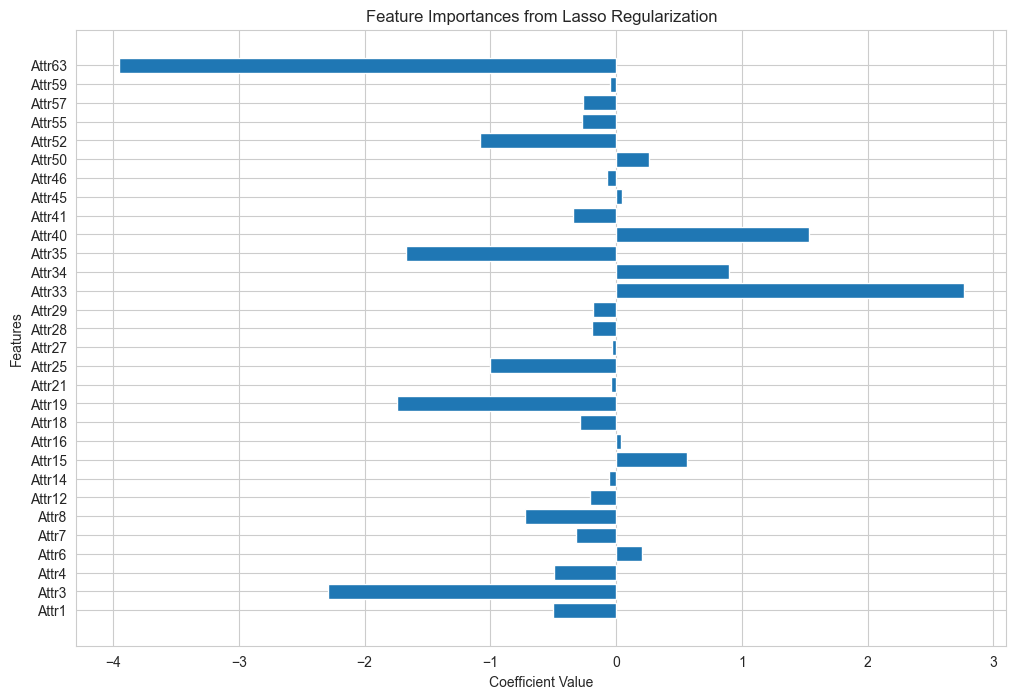

In [5]:
# Create a plot
plt.figure(figsize=(12, 8))
plt.barh(selected_features, selected_coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importances from Lasso Regularization')
plt.show()


Feature Importance Interpretation:

Coefficient Values: The magnitude and sign of the coefficients indicate the importance and direction of each feature's impact on the target variable.
Positive Coefficients: Features with positive coefficients positively impact the target variable.
Negative Coefficients: Features with negative coefficients negatively impact the target variable.

Reduced Dimensionality: By selecting only the important features, you simplify the model, making it easier to interpret and reducing the risk of overfitting.
Focus on Important Features: Concentrating on the selected features for further analysis or model building ensures that you are using the most relevant information from the dataset.